# Actividad 1 Clase 7
- Jorge Emiliano Pomar 
- A01709338
- 22 de abril de 2025

Ejercicio en Clase:

Usando el dataset unconv_MV_v5.csv el cual contiene información de características de pozos petroleros y su prodición por día, crea tres modelos de regresión lineal múltiple.

Cada modelo debe tener 2 variables independientes distintas y la variable dependiente en todos los casos deberá ser el nivel de producción (Prod)

Realiza el análisis de correlación entre las variables (numérico y gráfico) y en base a ello realiza la selección de tus variables.

Documenta tus observaciones durante tu análisis y modelado.


In [92]:
import pandas as pd        
import numpy as np
import statsmodels.api as sm           
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv("unconv_MV_v5.csv")
df.head(5)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Well,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.070000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.035000,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.955000,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.510000,58.262500,84.330000
TOC,200.0,0.990450,0.481588,-0.190000,0.617500,1.030000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.960000,2.142500,2.870000
Prod,200.0,4311.219852,992.038414,2107.139414,3618.064513,4284.687348,5086.089761,6662.622385


<Figure size 768x576 with 0 Axes>

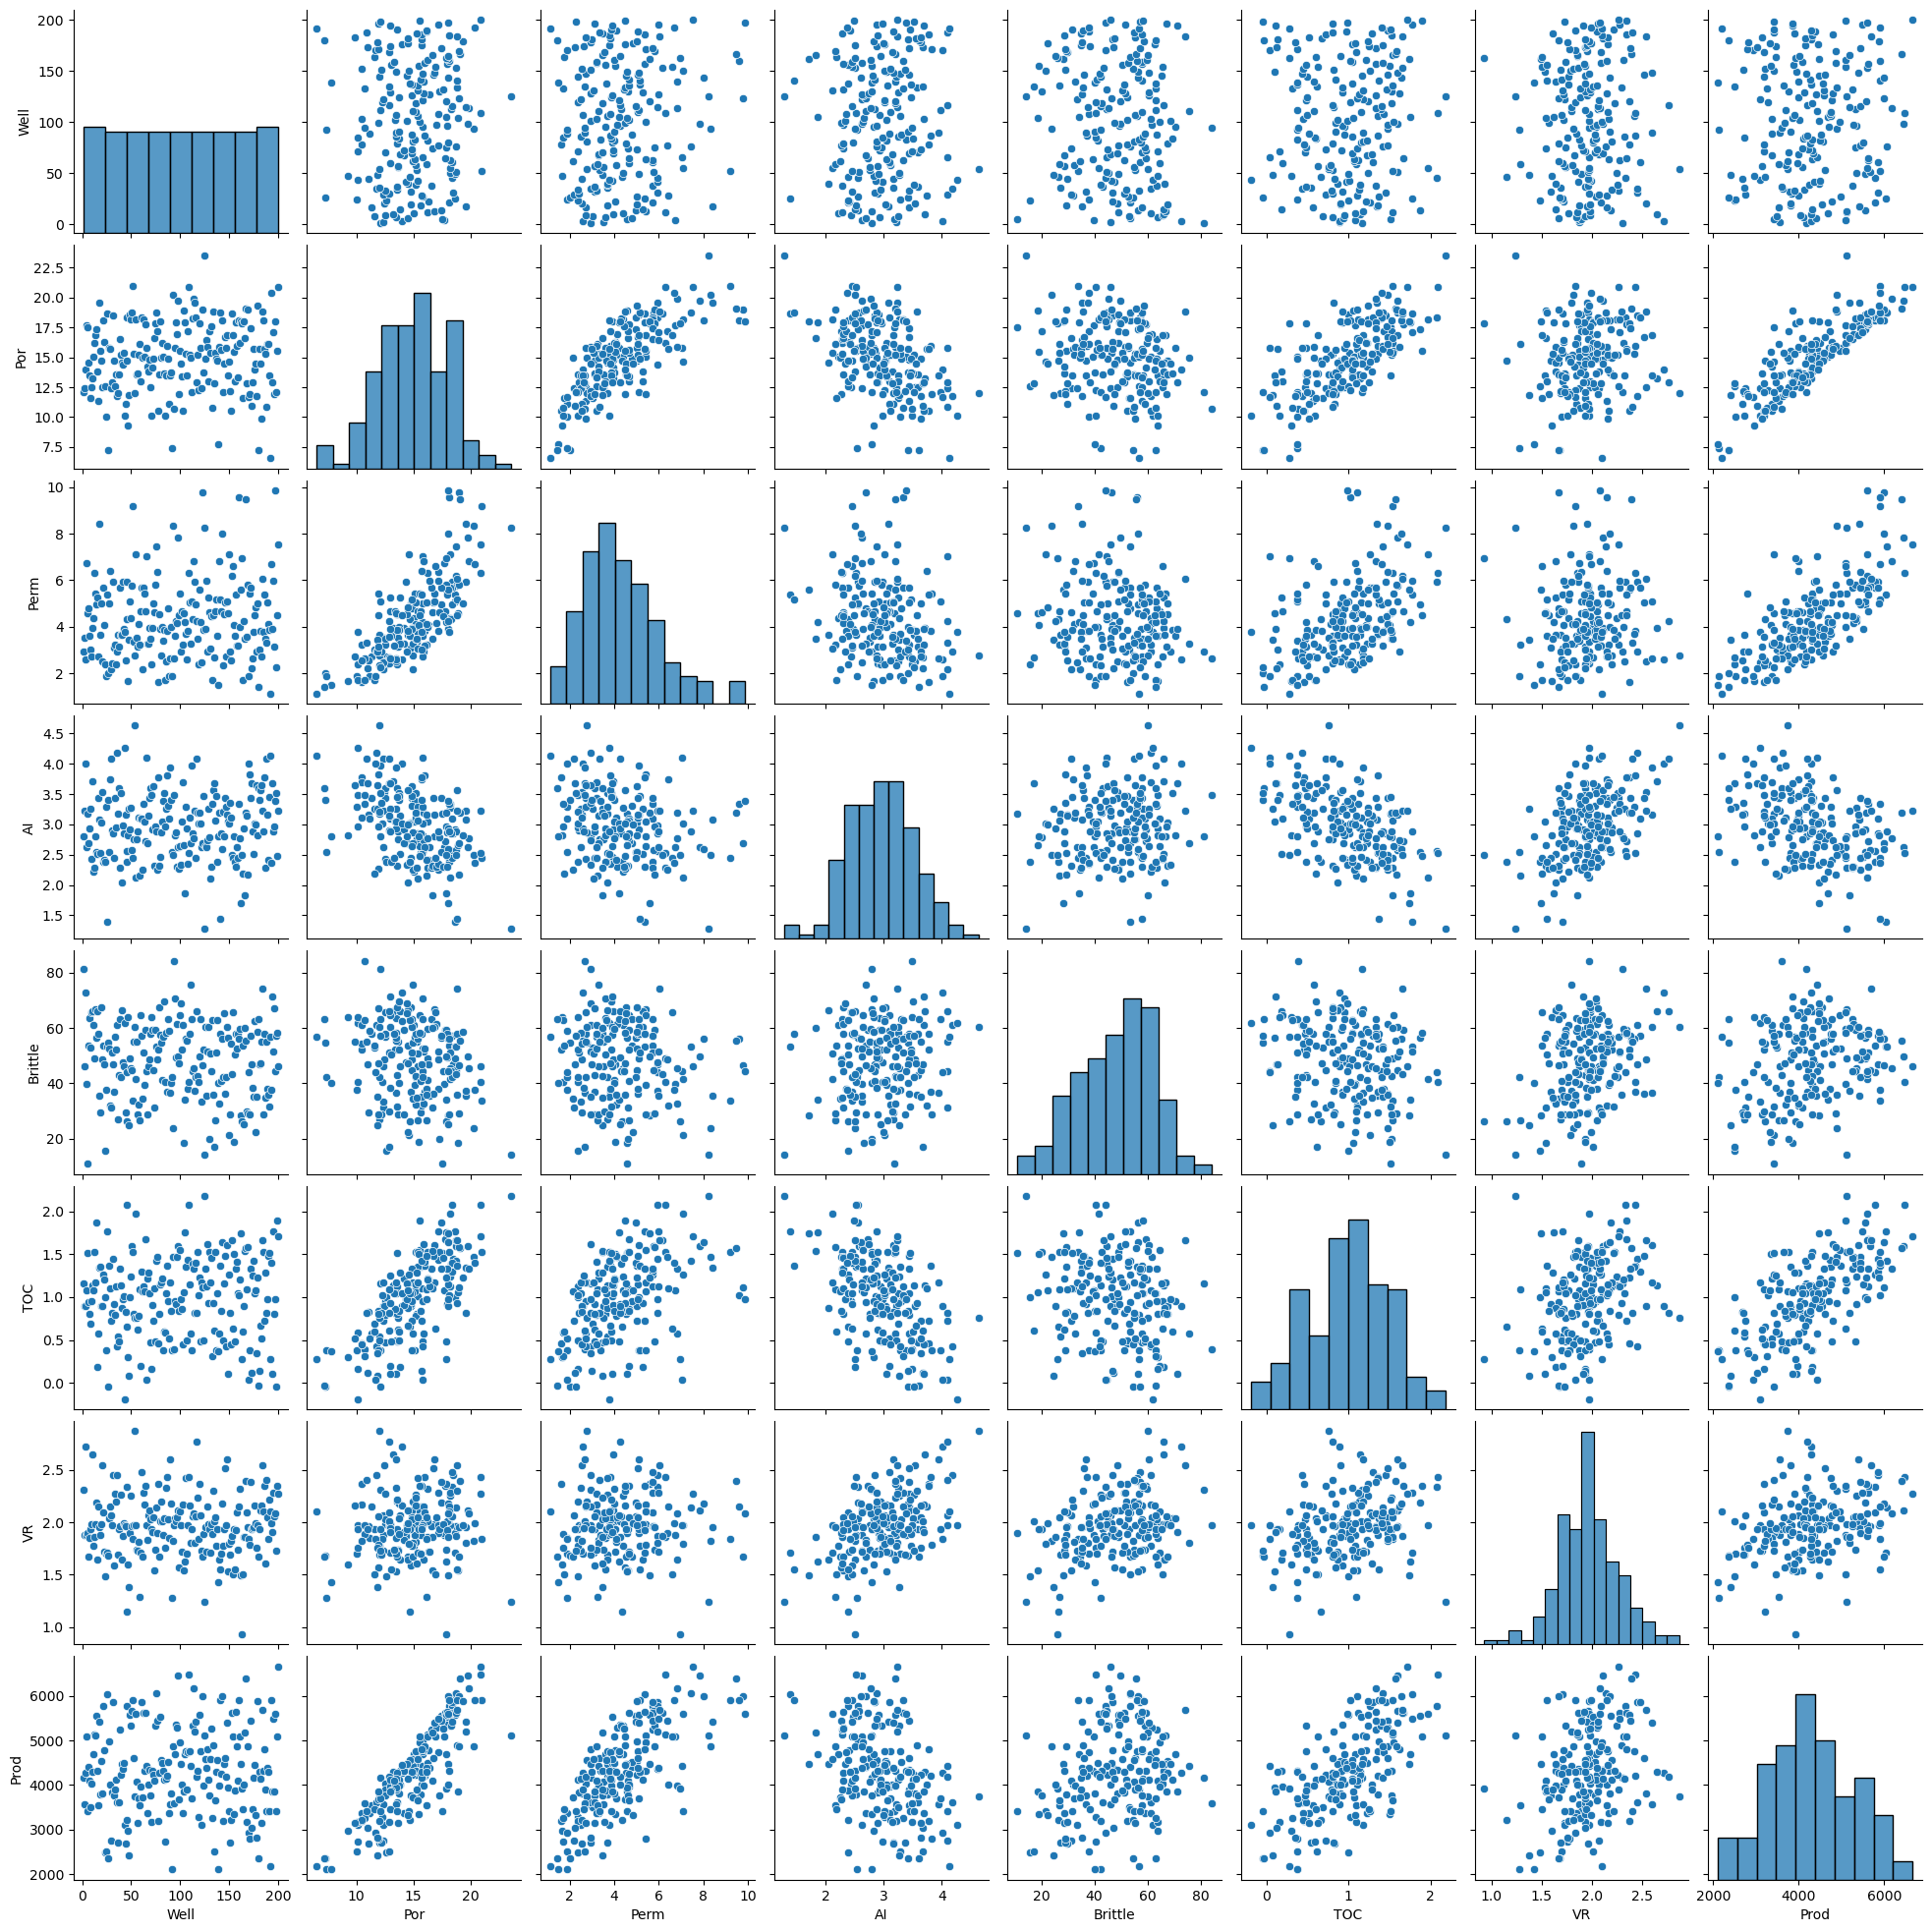

In [95]:
# Crear un pairplot del dataset
plt.figure(dpi=120) # resolution
sns.pairplot(df) # genera una matriz con plots de dispersion
plt.show()

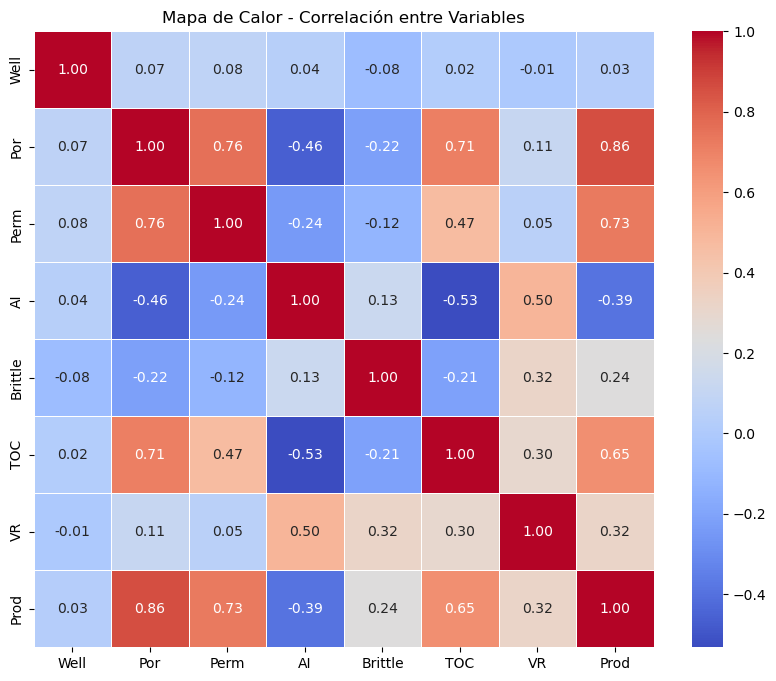

In [96]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor - Correlación entre Variables")
plt.show()

## Modelo 1

- Elegí las variables Por y Perm porque en las graficas se observa que más o menos se aproxima a una recta, y esto indica que hay una correlación fuerte con Prod. Así que empezaré con estas dos variables. Observandolas bien, tiene sentido que la porosidad y la permeabilidad influyan en la producción de un pozo petrolero. Son dos características que hacen que el petróleo fluya más o menos rápido. Viendo el heatmap, por y perm indican un 0.76 de correlación con Prod, lo que indica que hay una correlación fuerte entre estas variables.

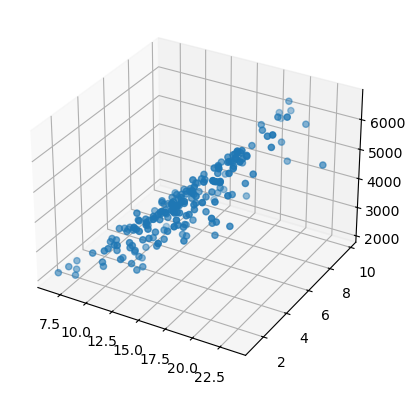

In [97]:
from matplotlib import pyplot          
from mpl_toolkits.mplot3d import Axes3D  
import random                            

fig = plt.figure()     
ax = plt.axes(projection='3d')


x1 = df["Por"]                          
x2 = df["Perm"]                             
y = df["Prod"]                               

ax.scatter3D(x1, x2, y, 'blue')

- Una vez que hacemos el 3d vemos que efectivamente hay una recta que indica la correlación. Vemos algunos outliers pero no son muchos.

In [98]:
mod = smf.ols('y ~ x1 + x2', data=df).fit() 
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     303.8
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           6.40e-61
Time:                        18:49:45   Log-Likelihood:                -1522.5
No. Observations:                 200   AIC:                             3051.
Df Residuals:                     197   BIC:                             3061.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    223.0289    193.728      1.151      0.2

Lo que resalta del summary es que R squared sale muy bajo con 0.125. Y esto indica que el modelo necesita más variables para poder explicar la producción.

In [99]:
mod.params

Intercept    223.028911
x1           244.468459
x2            97.749258
dtype: float64

In [100]:
xs = df[['Por','Perm']]
predicciones1=mod.predict(xs)
predicciones1

0      3461.635732
1      3594.603317
2      3903.647288
3      5202.594076
4      4952.830425
          ...     
195    3450.382176
196    5585.801667
197    3407.877453
198    4462.430127
199    6067.004428
Length: 200, dtype: float64

In [101]:
error_total1 = sum(abs(df['Prod'] - predicciones1))


In [102]:
error_total1

78025.19198510652

Con sklearn 

In [103]:
from sklearn import linear_model
X = df[['Por', 'Perm']].values.reshape(-1,2)
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
print (model.score(X,y))
print (model.coef_)
print (model.intercept_)
print (model.predict(X))

0.7551522975780863
[244.46845926  97.74925767]
223.0289113788067
[3461.63573168 3594.60331663 3903.64728761 5202.59407584 4952.83042522
 4245.32955387 3872.80575445 3350.15392039 3549.65200222 3847.36807184
 4328.95377987 4796.79359018 4864.78937276 4958.19424344 4118.18879834
 3261.17922029 5824.45854699 4390.58728235 4312.79560468 3518.8562203
 5200.18942358 4609.6161527  3541.84159311 2858.81616221 5309.72387492
 2196.79061814 4569.48748691 4696.06800984 3462.64181878 3609.80306226
 5320.45913655 4129.51669969 3605.86068483 3776.531314   3385.36080986
 3510.500829   3843.9763955  4826.15268091 4302.57863701 4136.34008472
 4315.69376898 4369.06528895 3071.43128231 3184.42222424 5293.56760603
 4244.36921801 2657.38215824 3458.19258519 5266.2187832  5096.58474196
 5361.53670039 6247.35848069 4293.30103589 3420.57151194 5356.59586107
 3895.29952153 3870.86792601 4342.16613322 4476.65619294 3856.63042255
 5258.86185381 4091.41545852 5231.97032329 4436.96956905 5017.85560405
 4765.4737953

Intercept    223.028911
x1           244.468459
x2            97.749258
dtype: float64

Y esto indica que el modelo no sirvió, principalmente porque los coeficientes están muy desbalanceados. Además, como lo adelantó r2, el modelo no es bueno por salir muy bajo. EL error fue de 78025.19198510652 después de comparar los resultados de la predicción con los resultados de producción reales.


## Modelo 2

- Las variables que escogí fueron AI y TOC. La verdad, tan solo juzgando por lo que significan, Impedencia acústica y contenido orgánico, no tiene mucho sentido decir que hay correlación. Pero elegí estas dos variables porque en las gráficas, se aprecia un comportamiento opuesto. La gráfica de AI decrece y la gráfica de TOC crece conforme la producción. Viendo el mapa de calor, efectivamente hay una correlación negativa entre las dos variables, siendo de -0.56. 

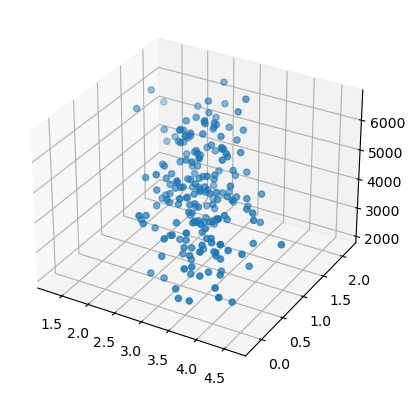

In [104]:
from matplotlib import pyplot          
from mpl_toolkits.mplot3d import Axes3D  
import random                            

fig = plt.figure()     
ax = plt.axes(projection='3d')


x1 = df["AI"]                          
x2 = df["TOC"]                             
y = df["Prod"]                               

ax.scatter3D(x1, x2, y, 'blue')

In [105]:
mod = smf.ols('y ~ x1 + x2', data=df).fit() 
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     74.56
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           7.76e-25
Time:                        18:49:45   Log-Likelihood:                -1606.9
No. Observations:                 200   AIC:                             3220.
Df Residuals:                     197   BIC:                             3230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3350.4681    416.859      8.037      0.0

In [106]:
mod.params

Intercept    3350.468059
x1           -104.344659
x2           1282.786042
dtype: float64

In [107]:
xs = df[['AI','TOC']]
predicciones2=mod.predict(xs)
predicciones2

0      4546.334821
1      4156.157833
2      4073.725552
3      4461.450530
4      4955.658965
          ...     
195    4066.793254
196    4254.913431
197    2931.863416
198    5516.158923
199    5206.998941
Length: 200, dtype: float64

In [108]:
error_total2 = sum(abs(df['Prod'] - predicciones2))
error_total2

118603.19395667218

Con sklearn

In [109]:
from sklearn import linear_model
X = df[['AI', 'TOC']].values.reshape(-1,2)
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
print (model.score(X,y))
print (model.coef_)
print (model.intercept_)
print (model.predict(X))

0.430848086139358
[-104.34465929 1282.7860418 ]
3350.468058749231
[4546.33482123 4156.15783304 4073.7255522  4461.45052996 4955.65896533
 4275.59980455 4070.96704047 3896.4702849  4315.55727639 4425.72546044
 4504.23184027 5074.18143293 4559.16268165 5483.19907573 3319.46445146
 3723.75392121 4748.01980415 4818.23722718 4188.81117872 4135.59540249
 4718.43818231 4651.16854044 4384.91381144 3494.63282557 5475.96027632
 2943.3413289  4841.80605483 4371.28367899 3847.30435235 4086.92524067
 4913.12554039 4274.98680195 4005.96685041 4492.19954108 3465.9053809
 3712.39995138 3591.60803197 4818.66767116 4445.5509457  4253.62881017
 4283.82343461 4347.6562354  2662.23046224 4085.45135009 5738.71283749
 3947.72311064 3441.0519321  3112.92735281 4329.61114202 4599.91571471
 5121.93209084 5057.48628744 4088.70563255 3842.26967801 5656.3458834
 4038.43763747 3844.23933932 4026.52928096 4523.32038025 3283.55682331
 4694.62146929 4488.27364007 4438.67726354 4405.84135924 5208.90327529
 2973.9663973

De nuevo obtuve un mal modelo. La diferencia de coeficientes es muy grande. 
Intercept    3350.468059
x1           -104.344659
x2           1282.786042
dtype: float64

Y el R squares es de 0.431. Y esto la verdad si indica que mejoró en comparación al modelo 1. Aún así sigue siendo un modelo que explica solamente el 43% de la producción, que es menos de la mitad de los datos. Hay una razón por la cuál hay muchas variables que se le atribuyen a los pozos petroleros, entonces esto no es raro porque es dificil predecir la producción con tan solo 2 variables. El error fue de 118603.19395667218 después de comparar los resultados de la predicción con los resultados de producción reales.

## Modelo 3

Brittle y VR, que son las variables que elegí, muestran una correlación de 0.32 con la producción. Esto indica que hay una correlación baja, pero no es nula. La verdad no estoy seguro de por qué elegí estas variables, pero al ver el mapa de calor, se ve que hay una correlación positiva entre las dos variables y la producción. Viendo la representación gráfica, observo que la distribución de los datos conforme a la producción es muy parecida en ambas Brittle y VR. También esto me ayudó a elegir las variables.

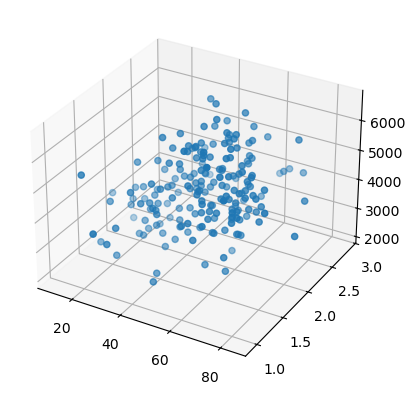

In [110]:
from matplotlib import pyplot          
from mpl_toolkits.mplot3d import Axes3D  
import random                            

fig = plt.figure()     
ax = plt.axes(projection='3d')


x1 = df["Brittle"]                          
x2 = df["VR"]                             
y = df["Prod"]                               

ax.scatter3D(x1, x2, y, 'blue')

In [111]:
mod = smf.ols('y ~ x1 + x2', data=df).fit() 
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     14.01
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           2.04e-06
Time:                        18:49:45   Log-Likelihood:                -1649.9
No. Observations:                 200   AIC:                             3306.
Df Residuals:                     197   BIC:                             3316.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2020.0826    446.611      4.523      0.0

In [112]:
mod.params

Intercept    2020.082602
x1             10.497894
x2            908.994668
dtype: float64

In [113]:
xs = df[['Brittle','VR']]
predicciones3=mod.predict(xs)
predicciones3

0      4974.388819
1      4213.680323
2      5256.794749
3      4146.913720
4      3862.019427
          ...     
195    4597.860106
196    4376.058153
197    4191.758162
198    4767.722370
199    4568.188243
Length: 200, dtype: float64

In [114]:
error_total3 = sum(abs(df['Prod'] - predicciones3))
error_total3

149205.29857710734

Con los resultados de este modelo volvemos a lo mismo que con el modelo 1. La diferencia de coeficientes es muy grande.
Intercept    2020.082602
x1             10.497894
x2            908.994668

Y el R squared es de 0.125, lo que indica que el modelo no sirve para predecir la producción.

Por otro lado, el error fue de 149205.29857710734 después de comparar los resultados de la predicción con los resultados de producción reales. 

## Conclusiones

El mejor modelo fue el modelo 1, esto porque tuvo un error asbsoluto de 78025, siendo el menor de los tres modelos. Esto significa que es el modelo que mejor explica y predice el comportamiento de la producción. Sabiendo que las variables significan la porosidad y la permeabilidad, esto tiene sentido porque son dos características que hacen que el petróleo fluya más o menos rápido. Independientemente de que el r2 fue muy bajo, y que los coeficientes estaban desbalanceados, el modelo fue el que mejor se comportó. Tuve un poco de problemas para diferenciar entre estos tres parámetros, pero al final el error absoluto fue el que me ayudó a decidir cuál era el mejor modelo porque era el que directamente comparaba la predicción con la producción real.

In [115]:
error_total1

78025.19198510652

In [116]:
error_total2

118603.19395667218

In [117]:
error_total3

149205.29857710734